# Final Analysis Framework v2.0 - Focused Results Analysis

This analysis framework focuses on understanding the experimental results from the construction invoice processing study, incorporating controlled experimental design considerations and practical system improvement insights.


## Setup


### Requirements Installation and Verification


In [1]:
import subprocess
import sys
from pathlib import Path

def install_requirements_simple():
    """Simple requirements installation."""
    # Find requirements file
    requirements_paths = [
        Path('../requirements/requirements_analysis.txt'),
        Path('../../requirements/requirements_analysis.txt'),
        Path('./requirements/requirements_analysis.txt')
    ]
    
    requirements_file = None
    for path in requirements_paths:
        if path.exists():
            requirements_file = path
            break
    
    if not requirements_file:
        print("❌ requirements_analysis.txt not found")
        return False
    
    print(f"📦 Installing packages from {requirements_file.name}...")
    
    try:
        result = subprocess.run([
            sys.executable, '-m', 'pip', 'install', '-r', str(requirements_file)
        ], capture_output=True, text=True)
        
        if result.returncode == 0:
            print("✅ Requirements installed successfully")
            return True
        else:
            print(f"❌ Installation failed: {result.stderr[:200]}...")
            return False
            
    except Exception as e:
        print(f"❌ Error installing requirements: {e}")
        return False

def verify_key_imports():
    """Quick verification of key imports."""
    key_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'sklearn']
    failed = []
    
    for lib in key_libraries:
        try:
            __import__(lib)
        except ImportError:
            failed.append(lib)
    
    if failed:
        print(f"⚠️  Some imports failed: {', '.join(failed)}")
        print("   You may need to restart the kernel")
        return False
    else:
        print("✅ All key libraries verified")
        return True

# Run installation and verification
print("🚀 Setting up analysis requirements...")
if install_requirements_simple():
    verify_key_imports()
else:
    print("⚠️  Installation had issues - proceeding anyway")

print("✅ Requirements setup complete")

🚀 Setting up analysis requirements...
📦 Installing packages from requirements_analysis.txt...
✅ Requirements installed successfully
✅ All key libraries verified
✅ Requirements setup complete


### Root Directory Detection


In [2]:
def find_project_root():
    """
    Find project root by locating directory containing .gitignore and .gitattributes.
    Similar to implementation in 03_pixtral_model.py
    """
    from pathlib import Path
    import sys
    
    try:
        # When running as a script, start from script location
        start_path = Path(__file__).parent
    except NameError:
        # When running in a notebook, start from current working directory
        start_path = Path.cwd()
    
    # Walk up the directory tree to find git markers
    current_path = start_path
    while current_path != current_path.parent:  # Stop at filesystem root
        if (current_path / ".gitignore").exists() and (current_path / ".gitattributes").exists():
            return current_path
        current_path = current_path.parent
    
    raise RuntimeError("Could not find project root (directory containing .gitignore and .gitattributes)")

def setup_project_paths():
    """Set up all project directory paths and verify they exist."""
    global ROOT_DIR, DELIVERABLES_DIR, DATA_DIR, RESULTS_DIR, ANALYSIS_DIR, CONFIG_DIR
    
    # Find and set root directory
    ROOT_DIR = find_project_root()
    print(f"✓ Found project root: {ROOT_DIR}")
    
    # Set up key directories
    DELIVERABLES_DIR = ROOT_DIR / "Deliverables-Code"
    DATA_DIR = DELIVERABLES_DIR / "data"
    RESULTS_DIR = DELIVERABLES_DIR / "results"
    ANALYSIS_DIR = DELIVERABLES_DIR / "analysis"
    CONFIG_DIR = DELIVERABLES_DIR / "config"
    
    # Verify expected directories exist
    required_dirs = {
        "Deliverables-Code": DELIVERABLES_DIR,
        "data": DATA_DIR,
        "results": RESULTS_DIR,
        "analysis": ANALYSIS_DIR,
        "config": CONFIG_DIR
    }
    
    missing_dirs = []
    for name, path in required_dirs.items():
        if path.exists():
            print(f"✓ Found {name} directory: {path}")
        else:
            print(f"⚠ Missing {name} directory: {path}")
            missing_dirs.append(name)
    
    if missing_dirs:
        print(f"\n⚠ Warning: {len(missing_dirs)} required directories not found")
        print("This may indicate the notebook is being run from an unexpected location")
    else:
        print("\n✓ All project directories located successfully")
    
    # Create analysis directory if it doesn't exist
    ANALYSIS_DIR.mkdir(parents=True, exist_ok=True)
    
    # Add project root to Python path for imports
    import sys
    if str(ROOT_DIR) not in sys.path:
        sys.path.append(str(ROOT_DIR))
        print(f"✓ Added project root to Python path")
    
    return ROOT_DIR

def display_project_structure():
    """Display relevant project structure for reference."""
    print("\n=== Project Structure (Key Directories) ===")
    print(f"ROOT_DIR:         {ROOT_DIR}")
    print(f"DELIVERABLES_DIR: {DELIVERABLES_DIR}")
    print(f"DATA_DIR:         {DATA_DIR}")
    print(f"RESULTS_DIR:      {RESULTS_DIR}")
    print(f"ANALYSIS_DIR:     {ANALYSIS_DIR}")
    print(f"CONFIG_DIR:       {CONFIG_DIR}")
    
    # Show counts of files in key directories
    if RESULTS_DIR.exists():
        result_files = list(RESULTS_DIR.glob("*.json"))
        print(f"\nResult files found: {len(result_files)}")
        
    if ANALYSIS_DIR.exists():
        analysis_files = list(ANALYSIS_DIR.glob("*.json"))
        print(f"Analysis files found: {len(analysis_files)}")
        
    if (DATA_DIR / "images" / "metadata").exists():
        metadata_files = list((DATA_DIR / "images" / "metadata").glob("*.csv"))
        print(f"Metadata files found: {len(metadata_files)}")

# Run root directory detection and path setup
print("=== Root Directory Detection & Path Setup ===")
project_root = setup_project_paths()
display_project_structure()

print(f"\n🎯 Ready to proceed with analysis from: {ROOT_DIR.name}")

=== Root Directory Detection & Path Setup ===
✓ Found project root: d:\UCSD_MJM
✓ Found Deliverables-Code directory: d:\UCSD_MJM\Deliverables-Code
✓ Found data directory: d:\UCSD_MJM\Deliverables-Code\data
✓ Found results directory: d:\UCSD_MJM\Deliverables-Code\results
✓ Found analysis directory: d:\UCSD_MJM\Deliverables-Code\analysis
✓ Found config directory: d:\UCSD_MJM\Deliverables-Code\config

✓ All project directories located successfully
✓ Added project root to Python path

=== Project Structure (Key Directories) ===
ROOT_DIR:         d:\UCSD_MJM
DELIVERABLES_DIR: d:\UCSD_MJM\Deliverables-Code
DATA_DIR:         d:\UCSD_MJM\Deliverables-Code\data
RESULTS_DIR:      d:\UCSD_MJM\Deliverables-Code\results
ANALYSIS_DIR:     d:\UCSD_MJM\Deliverables-Code\analysis
CONFIG_DIR:       d:\UCSD_MJM\Deliverables-Code\config

Result files found: 15
Analysis files found: 15
Metadata files found: 2

🎯 Ready to proceed with analysis from: UCSD_MJM


### Import Libraries


In [3]:
# Import standard libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, kruskal
import json
import yaml
from pathlib import Path
import warnings
from datetime import datetime
from typing import Dict, List, Tuple, Any, Optional
import re
from collections import defaultdict, Counter
import itertools

# Statistical and machine learning utilities
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Progress tracking
from tqdm import tqdm

# Import and configure styling from centralized styling module
# Add src directory to path for imports
import sys
src_dir = ROOT_DIR / "Deliverables-Code" / "notebooks" / "src"
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

from src.styling import configure_styling, print_styling_info, ANALYSIS_COLORS

# Configure all styling settings
configure_styling()

# Print styling information
print_styling_info()

✓ All libraries imported successfully
✓ Plotting parameters configured
✓ Custom color palette defined
✓ Analysis environment ready

📊 Available analysis colors: ['LMM', 'OCR', 'Pixtral', 'Llama', 'DocTR', 'accuracy', 'cer', 'work_order', 'total_cost', 'baseline', 'improvement']
🎨 Visualization settings optimized for analysis reports
📏 Industry automation threshold: 85%


### Data Loading Functions


In [4]:
# Import data loading functions from the modular src package
import sys
from pathlib import Path

# Use the already-established ROOT_DIR to find src directory
src_dir = ROOT_DIR / "Deliverables-Code" / "notebooks" / "src"
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

print(f"📁 Using src directory: {src_dir}")

# Import all data loading functions and path constants
from src.data_loader import (
    # Core data loading functions
    load_ground_truth_data,
    discover_results_files, 
    discover_analysis_files,
    load_results_file,
    load_analysis_file,
    load_all_results,
    load_all_analysis,
    select_files_interactive,
    create_comprehensive_dataset,
    
    # Utility functions
    get_project_info,
    initialize_data_loader,
    
    # Project path constants (these will override the ones from cell 3)
    DELIVERABLES_DIR,
    DATA_DIR,
    RESULTS_DIR,
    ANALYSIS_DIR,
    CONFIG_DIR
)

print("✅ Data loading functions imported from modular src package")
print(f"📁 Project root: {ROOT_DIR}")
print(f"📊 Data directory: {DATA_DIR}")
print(f"🔬 Results directory: {RESULTS_DIR}")
print(f"📈 Analysis directory: {ANALYSIS_DIR}")

# Initialize data loader and create global datasets
print("\n" + "="*70)
print("🚀 Initializing Data Loader")
print("="*70)

# Initialize and get summary data
initialization_results = initialize_data_loader()

# Extract key datasets for global access
GROUND_TRUTH_DATA = initialization_results['ground_truth_data']
COMPREHENSIVE_DATASET = initialization_results['comprehensive_dataset']
available_results = initialization_results['available_results']
available_analysis = initialization_results['available_analysis']

print("\n" + "="*70)
print("✅ Data loading setup complete - ready for analysis!")
print("="*70)

# Display what's available for analysis
print(f"\n🎯 Global Variables Available:")
print(f"   • GROUND_TRUTH_DATA: {len(GROUND_TRUTH_DATA) if GROUND_TRUTH_DATA is not None else 'None'} records")
print(f"   • COMPREHENSIVE_DATASET: {'Available' if COMPREHENSIVE_DATASET is not None else 'None'}")
print(f"   • available_results: {len(available_results['all'])} files across {len([k for k in available_results.keys() if k != 'all' and available_results[k]])} model types")
print(f"   • available_analysis: {len(available_analysis['all'])} files across {len([k for k in available_analysis.keys() if k != 'all' and available_analysis[k]])} model types")

print(f"\n📂 Project Paths Available:")
for path_name in ['ROOT_DIR', 'DATA_DIR', 'RESULTS_DIR', 'ANALYSIS_DIR', 'CONFIG_DIR']:
    print(f"   • {path_name}")

📁 Using src directory: d:\UCSD_MJM\Deliverables-Code\notebooks\src
✅ Data loading functions imported from modular src package
📁 Project root: d:\UCSD_MJM
📊 Data directory: d:\UCSD_MJM\Deliverables-Code\data
🔬 Results directory: d:\UCSD_MJM\Deliverables-Code\results
📈 Analysis directory: d:\UCSD_MJM\Deliverables-Code\analysis

🚀 Initializing Data Loader
ℹ️  Initializing data loader
INFO: Discovering results files
INFO: Found 15 total results files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Loaded ground truth data: 549 records
✅ Ground truth loaded: 549 records
INFO: Creating comprehensive dataset
INFO: Loaded ground truth data: 549 records
INFO: Loading all analysis files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO:

## Section 1: Executive Summary


### Experimental Design & Controlled Variables

*Placeholder for discussion of controlled experimental design, image quality control, content standardization, and design rationale.*


### Cell 1.1: LMM vs. OCR Comparison


*Placeholder for key findings discussion and business case establishment.*


🎯 PRIMARY PERFORMANCE COMPARISON SUMMARY

📊 AGGREGATE PERFORMANCE RESULTS
----------------------------------------
Large Multimodal Models (LMM):
  • Overall Accuracy: 76.9%
  • Work Order Accuracy: 67.7%
  • Total Cost Accuracy: 86.2%

Optical Character Recognition (OCR):
  • Overall Accuracy: 43.4%
  • Work Order Accuracy: 37.4%
  • Total Cost Accuracy: 49.4%

📈 PERFORMANCE GAP ANALYSIS
----------------------------------------
LMM Advantage over OCR:
  • Overall Performance: +33.5 percentage points
  • Work Order Extraction: +30.2 percentage points
  • Total Cost Extraction: +36.8 percentage points

🎯 INDUSTRY AUTOMATION THRESHOLD ANALYSIS
----------------------------------------
Industry Standard: 85%
LMM Performance vs Standard: ❌ BELOW (76.9% vs 85%)
OCR Performance vs Standard: ❌ BELOW (43.4% vs 85%)

⚠️  CONCLUSION: Neither approach meets industry automation standards


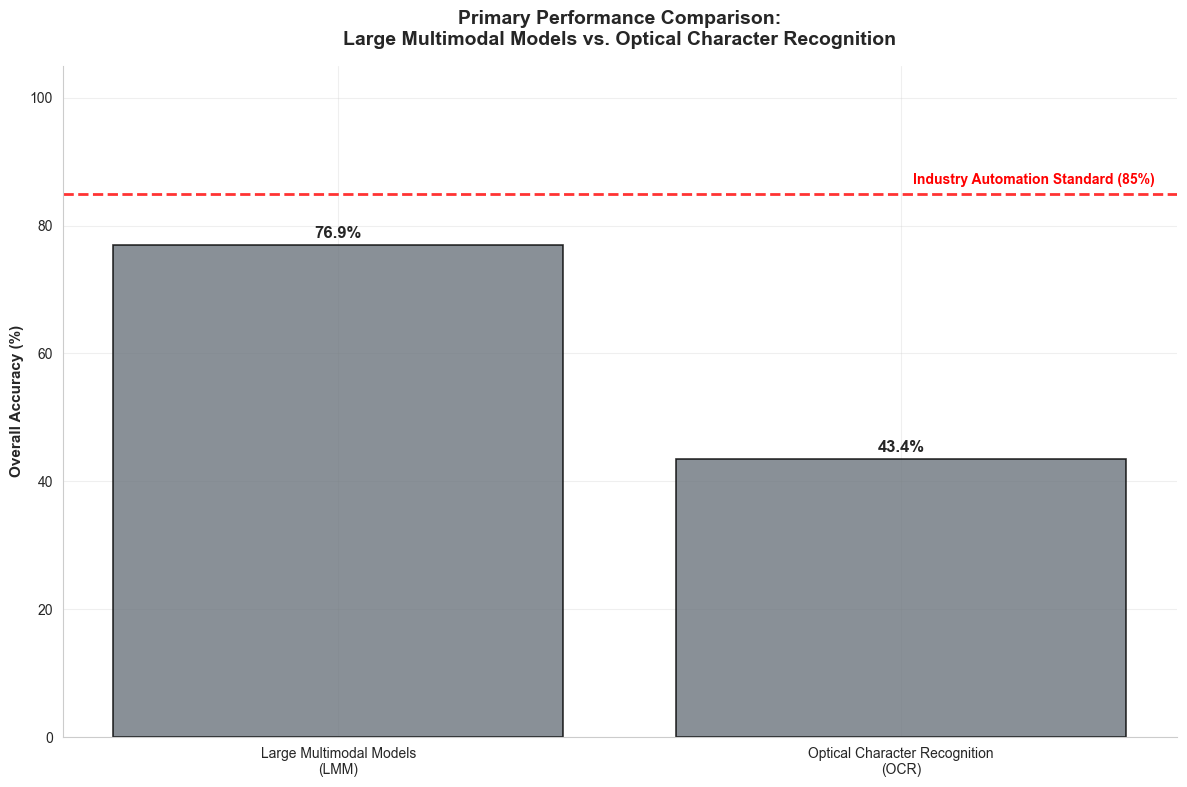


📋 Analysis Complete - Chart displayed above
📊 Data processed from: d:\UCSD_MJM\Deliverables-Code\analysis
🔍 LMM trials analyzed: 8
🔍 OCR trials analyzed: 7


In [5]:
## Primary Performance Comparison: LMM vs OCR

# Import visualization functions from our src module
from src.visualization import generate_primary_performance_analysis

# Generate the primary performance comparison chart and summary
fig, model_accuracies = generate_primary_performance_analysis(ANALYSIS_DIR)

# Display the chart
plt.show()

print(f"\n📋 Analysis Complete - Chart displayed above")
print(f"📊 Data processed from: {ANALYSIS_DIR}")
print(f"🔍 LMM trials analyzed: {len([f for f in ANALYSIS_DIR.glob('analysis-*') if 'pixtral' in f.name or 'llama' in f.name])}")
print(f"🔍 OCR trials analyzed: {len([f for f in ANALYSIS_DIR.glob('analysis-*') if 'doctr' in f.name])}")


🔄 Creating comprehensive performance comparison grid...
   • Upper Left: LMM vs OCR (Overall Accuracy)
   • Upper Right: Pixtral vs Llama vs OCR (Overall Accuracy)
   • Lower Left: LMM vs OCR (Character Error Rate)
   • Lower Right: Pixtral vs Llama vs OCR (Character Error Rate)

🎨 Using standardized color scheme:
   • LMM/Pixtral: #2E86AB (Blue)
   • Llama: #00A6D6 (Light Blue)
   • OCR: #A23B72 (Purple)
   • Industry Standard: 85% threshold



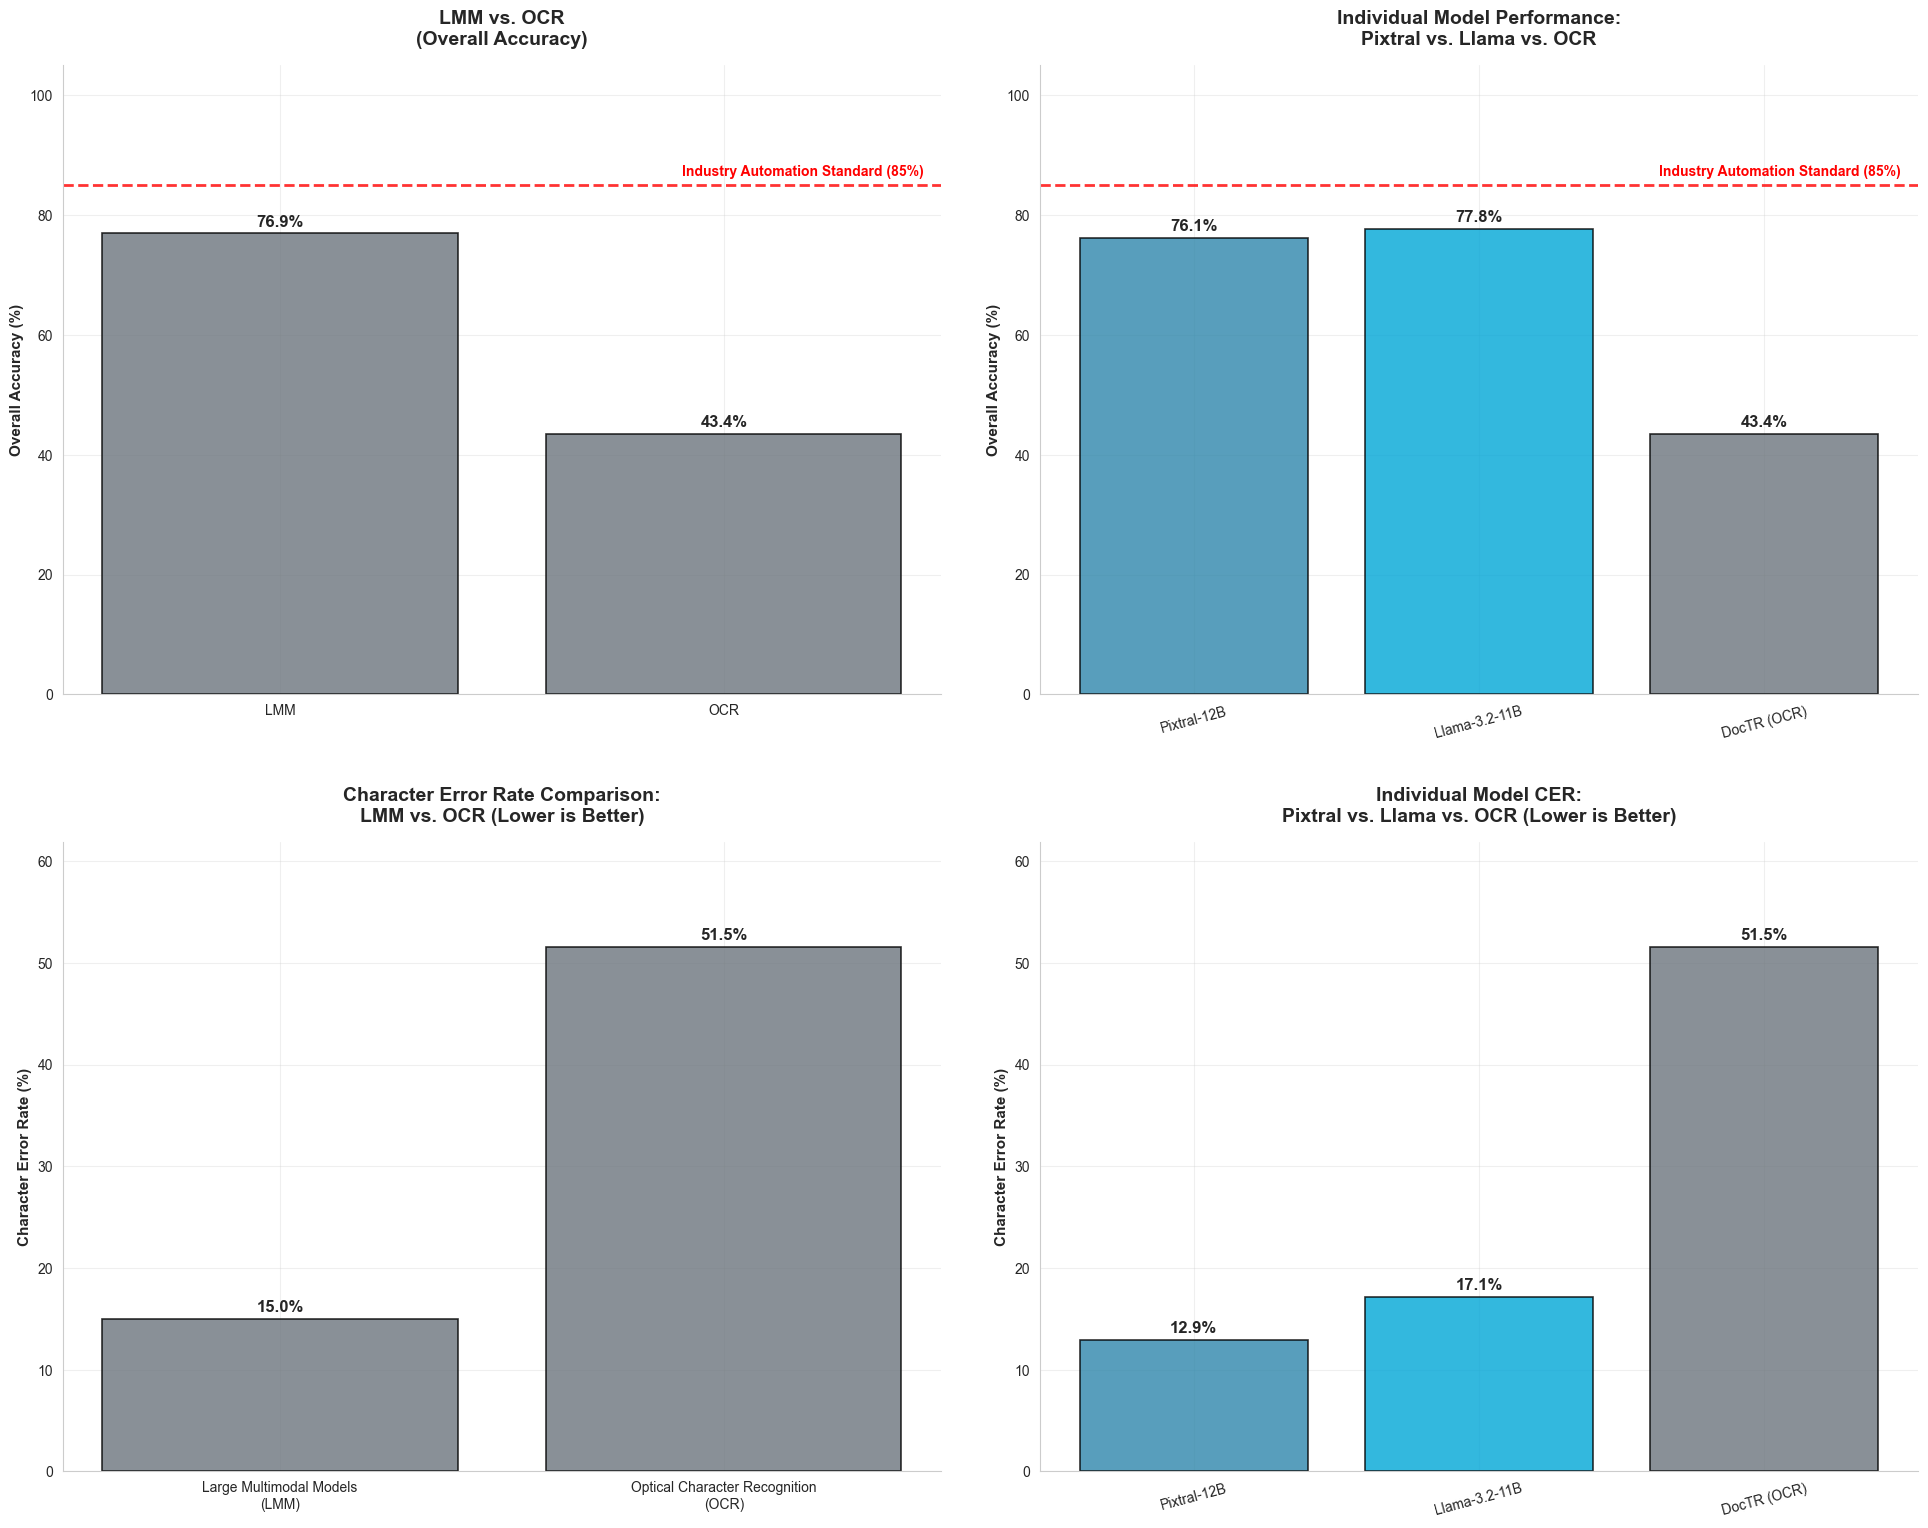


📊 COMPREHENSIVE PERFORMANCE GRID ANALYSIS

🎯 UPPER LEFT - LMM vs OCR (Accuracy):
   LMM: 76.9%  |  OCR: 43.4%  |  Gap: +33.5pp

🎯 UPPER RIGHT - Individual Models (Accuracy):
   Pixtral: 76.1%  |  Llama: 77.8%  |  OCR: 43.4%

🎯 LOWER LEFT - LMM vs OCR (Character Error Rate):
   LMM: 15.0%  |  OCR: 51.5%  |  LMM Advantage: -36.5pp

🎯 LOWER RIGHT - Individual Models (Character Error Rate):
   Pixtral: 12.9%  |  Llama: 17.1%  |  OCR: 51.5%

🏆 KEY INSIGHTS:
   • Best Overall Accuracy: Llama (77.8%)
   • Lowest Error Rate: Pixtral (12.9%)
   • Industry Standard (85%): ❌ LMMs Below | ❌ OCR Below


In [6]:
## Comprehensive Performance Comparison Grid

# Import the grid visualization function and styling from our src modules
from src.visualization import create_performance_comparison_grid
from src.styling import ANALYSIS_COLORS, INDUSTRY_STANDARDS

# Create the 2x2 grid of performance comparisons
print("🔄 Creating comprehensive performance comparison grid...")
print("   • Upper Left: LMM vs OCR (Overall Accuracy)")
print("   • Upper Right: Pixtral vs Llama vs OCR (Overall Accuracy)")
print("   • Lower Left: LMM vs OCR (Character Error Rate)")
print("   • Lower Right: Pixtral vs Llama vs OCR (Character Error Rate)")
print()
print(f"🎨 Using standardized color scheme:")
print(f"   • LMM/Pixtral: {ANALYSIS_COLORS['Pixtral']} (Blue)")
print(f"   • Llama: {ANALYSIS_COLORS['Llama']} (Light Blue)")
print(f"   • OCR: {ANALYSIS_COLORS['OCR']} (Purple)")
print(f"   • Industry Standard: {INDUSTRY_STANDARDS['automation_threshold']}% threshold")
print()

# Generate the grid visualization
grid_fig, all_performance_data = create_performance_comparison_grid(ANALYSIS_DIR)

# Display the grid
plt.show()

print("\n" + "="*80)
print("📊 COMPREHENSIVE PERFORMANCE GRID ANALYSIS")
print("="*80)

# Print summary statistics for each quadrant
print("\n🎯 UPPER LEFT - LMM vs OCR (Accuracy):")
lmm_acc = all_performance_data['lmm_vs_ocr_accuracy']['LMM']['overall_accuracy']
ocr_acc = all_performance_data['lmm_vs_ocr_accuracy']['OCR']['overall_accuracy']
print(f"   LMM: {lmm_acc:.1%}  |  OCR: {ocr_acc:.1%}  |  Gap: +{(lmm_acc-ocr_acc)*100:.1f}pp")

print("\n🎯 UPPER RIGHT - Individual Models (Accuracy):")
pix_acc = all_performance_data['individual_accuracy']['Pixtral']['overall_accuracy']
llama_acc = all_performance_data['individual_accuracy']['Llama']['overall_accuracy']
ocr_acc_ind = all_performance_data['individual_accuracy']['OCR']['overall_accuracy']
print(f"   Pixtral: {pix_acc:.1%}  |  Llama: {llama_acc:.1%}  |  OCR: {ocr_acc_ind:.1%}")

print("\n🎯 LOWER LEFT - LMM vs OCR (Character Error Rate):")
lmm_cer = all_performance_data['lmm_vs_ocr_cer']['LMM']['overall_cer']
ocr_cer = all_performance_data['lmm_vs_ocr_cer']['OCR']['overall_cer']
print(f"   LMM: {lmm_cer:.1%}  |  OCR: {ocr_cer:.1%}  |  LMM Advantage: -{(ocr_cer-lmm_cer)*100:.1f}pp")

print("\n🎯 LOWER RIGHT - Individual Models (Character Error Rate):")
pix_cer = all_performance_data['individual_cer']['Pixtral']['overall_cer']
llama_cer = all_performance_data['individual_cer']['Llama']['overall_cer']
ocr_cer_ind = all_performance_data['individual_cer']['OCR']['overall_cer']
print(f"   Pixtral: {pix_cer:.1%}  |  Llama: {llama_cer:.1%}  |  OCR: {ocr_cer_ind:.1%}")

print("\n🏆 KEY INSIGHTS:")
print(f"   • Best Overall Accuracy: {'Llama' if llama_acc > pix_acc else 'Pixtral'} ({max(llama_acc, pix_acc):.1%})")
print(f"   • Lowest Error Rate: {'Llama' if llama_cer < pix_cer else 'Pixtral'} ({min(llama_cer, pix_cer):.1%})")
industry_threshold = INDUSTRY_STANDARDS['automation_threshold'] / 100
print(f"   • Industry Standard ({INDUSTRY_STANDARDS['automation_threshold']}%): {'✅ LMMs Meet' if lmm_acc >= industry_threshold else '❌ LMMs Below'} | {'✅ OCR Meets' if ocr_acc >= industry_threshold else '❌ OCR Below'}")

print("="*80)


## Section 2: Cross-Model Performance Comparison


### Cell 2.1: Comprehensive Model Performance Analysis


🚀 PROMPT TYPE PERFORMANCE ANALYSIS
📊 Analyzing LMM performance across different prompt strategies...
🎯 Side-by-side comparison: Accuracy vs Character Error Rate

🚀 Generating Prompt Type Performance Analysis...

📈 DETAILED RESULTS BY PROMPT TYPE

🎯 ACCURACY PERFORMANCE (sorted highest to lowest):
   • Step By Step: 78.5% ❌ Below 85%
   • Basic Extraction: 78.0% ❌ Below 85%
   • Locational: 77.5% ❌ Below 85%
   • Detailed: 73.0% ❌ Below 85%

🎯 CHARACTER ERROR RATE PERFORMANCE (sorted lowest to highest):
   • Step By Step: 10.6% ⚠️ Needs Improvement (≥10%)
   • Locational: 14.3% ⚠️ Needs Improvement (≥10%)
   • Basic Extraction: 17.2% ⚠️ Needs Improvement (≥10%)
   • Detailed: 22.7% ⚠️ Needs Improvement (≥10%)

✅ Prompt Type Performance Analysis Complete
🎯 Accuracy data points analyzed: 4 prompt types
🎯 CER data points analyzed: 4 prompt types


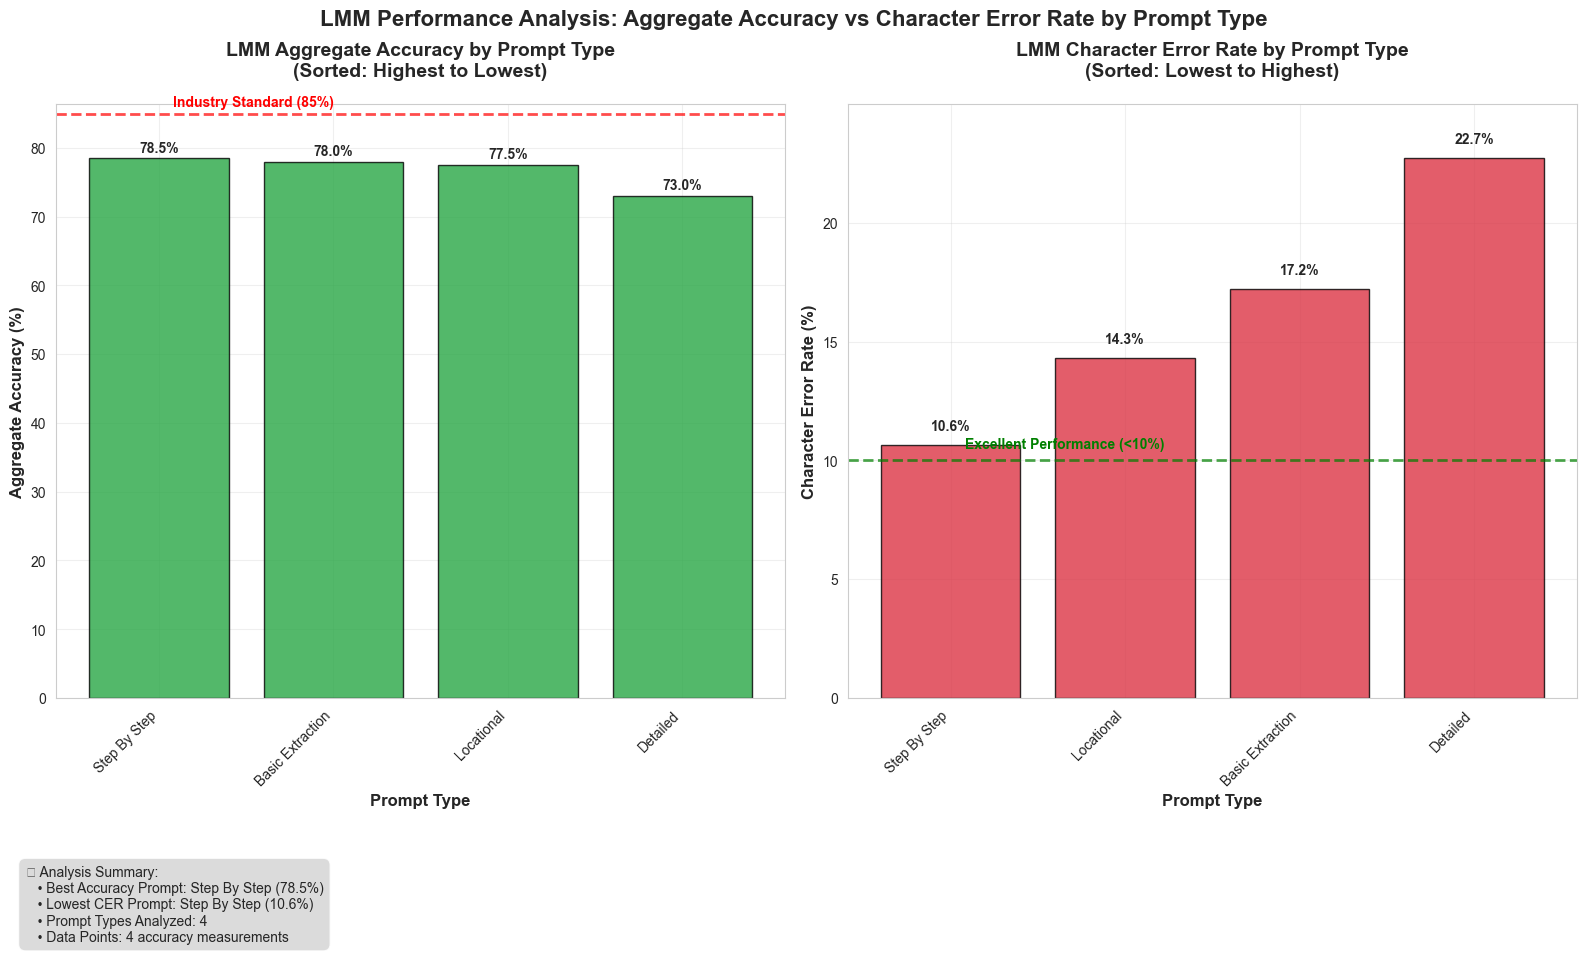


📋 Analysis Complete - Chart displayed above
📊 Data processed from comprehensive dataset
🔍 Prompt types analyzed: 4
🔍 Total experiments processed: 8

🏆 KEY FINDINGS:
   • Best Accuracy Prompt: Step By Step (78.5%)
   • Lowest CER Prompt: Step By Step (10.6%)
   • Prompt strategies tested: 4
   • ❌ No prompts meet 85% industry standard


In [7]:
## Section 2.1: Prompt Type Performance Analysis

# Import prompt performance analysis function from centralized visualization module
from src.visualization import generate_prompt_performance_analysis

# Generate the complete prompt type performance analysis
print("🚀 PROMPT TYPE PERFORMANCE ANALYSIS")
print("="*70)
print("📊 Analyzing LMM performance across different prompt strategies...")
print("🎯 Side-by-side comparison: Accuracy vs Character Error Rate")
print()

fig, accuracy_data, cer_data = generate_prompt_performance_analysis(COMPREHENSIVE_DATASET)

# Display the chart
plt.show()

print(f"\n📋 Analysis Complete - Chart displayed above")
print(f"📊 Data processed from comprehensive dataset")
print(f"🔍 Prompt types analyzed: {len(accuracy_data) if accuracy_data else 0}")

if accuracy_data:
    # Calculate total experiments safely
    try:
        total_experiments = 0
        for model_type in ['pixtral', 'llama']:
            if model_type in COMPREHENSIVE_DATASET['model_data']:
                experiments = COMPREHENSIVE_DATASET['model_data'][model_type]
                if hasattr(experiments, '__len__'):
                    total_experiments += len(experiments)
        print(f"🔍 Total experiments processed: {total_experiments}")
    except Exception as e:
        print(f"🔍 Total experiments processed: Unable to calculate ({str(e)})")
    
    print(f"\n🏆 KEY FINDINGS:")
    if accuracy_data:
        best_prompt = max(accuracy_data.items(), key=lambda x: x[1])
        print(f"   • Best Accuracy Prompt: {best_prompt[0].replace('_', ' ').title()} ({best_prompt[1]*100:.1f}%)")
    
    if cer_data:
        best_cer_prompt = min(cer_data.items(), key=lambda x: x[1])
        print(f"   • Lowest CER Prompt: {best_cer_prompt[0].replace('_', ' ').title()} ({best_cer_prompt[1]*100:.1f}%)")
    
    print(f"   • Prompt strategies tested: {len(accuracy_data)}")
    
    # Check if any prompts meet industry standards
    meets_standard = [p for p, acc in accuracy_data.items() if acc >= 0.85]
    if meets_standard:
        print(f"   • ✅ Prompts meeting 85% standard: {len(meets_standard)}")
    else:
        print(f"   • ❌ No prompts meet 85% industry standard")

print("="*70)


## Section 2.2: Field-Specific Performance Analysis


In [8]:
# Updated visualization - reload to get simplified accuracy-only chart
import importlib
import src.visualization
importlib.reload(src.visualization)


<module 'src.visualization' from 'd:\\UCSD_MJM\\Deliverables-Code\\notebooks\\src\\visualization.py'>

🎯 FIELD-SPECIFIC PERFORMANCE ANALYSIS
📊 Comparing LMM performance across different extraction fields...
🔍 Work Order vs Total Cost: Side-by-side comparison
📈 Left Chart: Accuracy | Right Chart: Character Error Rate

🚀 Generating Field Type Performance Analysis...

📈 DETAILED RESULTS BY FIELD TYPE

🎯 ACCURACY PERFORMANCE:
   • Total Cost: 86.0% ✅ Above 85%
   • Work Order: 67.5% ❌ Below 85%

🔍 COMPARATIVE ANALYSIS:
   • Better Accuracy Field: Total Cost (+18.5pp advantage)
   • Work Order meets 85% standard: ❌ No
   • Total Cost meets 85% standard: ✅ Yes
   • ⚠️  Notable performance gap: 18.5 percentage points
   • 💡 Consider optimizing total cost extraction strategies

✅ Field Type Performance Analysis Complete
🎯 Field types analyzed: 2
📊 Focus: Accuracy comparison (CER analysis removed for clarity)


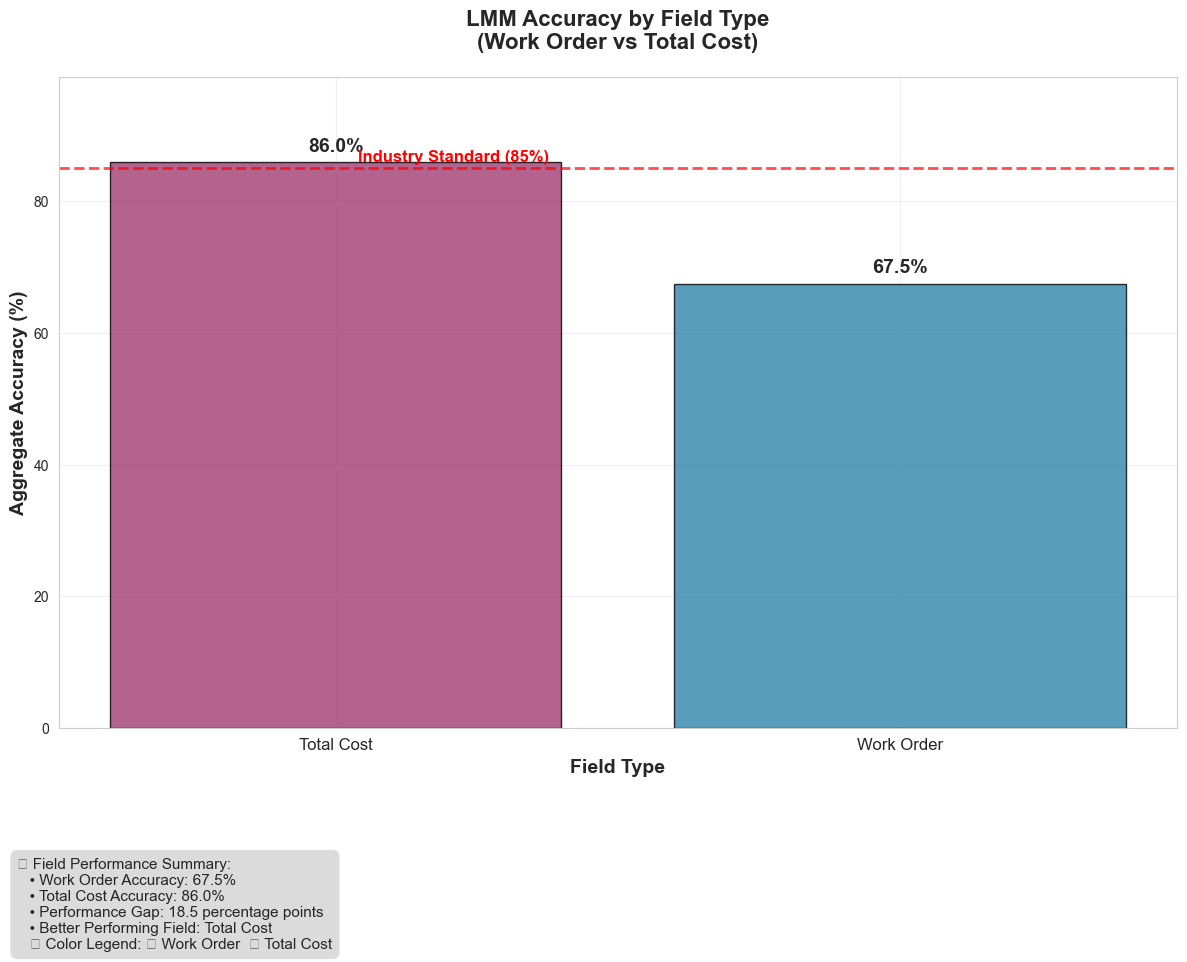


📋 Analysis Complete - Chart displayed above
📊 Data processed from comprehensive dataset
🔍 Field types analyzed: 2

🏆 FIELD COMPARISON INSIGHTS:
   • Work Order Accuracy: 67.5%
   • Total Cost Accuracy: 86.0%
   • Accuracy Gap: 18.5 percentage points
   • Work Order CER: 16.2%
   • Total Cost CER: 16.2%
   • CER Gap: 0.0 percentage points

📊 STRATEGIC INSIGHTS:
   • Better performing field (accuracy): Total Cost
   • Industry standard (85%): ✅ Met by at least one field
   • ⚠️  Significant performance gap detected (18.5pp)
   • 💡 Consider field-specific optimization strategies


In [9]:

# Import field performance analysis function from centralized visualization module
from src.visualization import generate_field_performance_analysis

# Generate the complete field type performance analysis
print("🎯 FIELD-SPECIFIC PERFORMANCE ANALYSIS")
print("="*70)
print("📊 Comparing LMM performance across different extraction fields...")
print("🔍 Work Order vs Total Cost: Side-by-side comparison")
print("📈 Left Chart: Accuracy | Right Chart: Character Error Rate")
print()

fig, accuracy_data, cer_data = generate_field_performance_analysis(COMPREHENSIVE_DATASET)

# Display the chart
plt.show()

print(f"\n📋 Analysis Complete - Chart displayed above")
print(f"📊 Data processed from comprehensive dataset")
print(f"🔍 Field types analyzed: {len(accuracy_data) if accuracy_data else 0}")

if accuracy_data and len(accuracy_data) == 2:
    # Calculate performance differences
    wo_acc = accuracy_data.get('work_order', 0) * 100
    tc_acc = accuracy_data.get('total_cost', 0) * 100
    acc_gap = abs(wo_acc - tc_acc)
    
    print(f"\n🏆 FIELD COMPARISON INSIGHTS:")
    print(f"   • Work Order Accuracy: {wo_acc:.1f}%")
    print(f"   • Total Cost Accuracy: {tc_acc:.1f}%")
    print(f"   • Accuracy Gap: {acc_gap:.1f} percentage points")
    
    if cer_data and len(cer_data) == 2:
        wo_cer = cer_data.get('work_order', 0) * 100
        tc_cer = cer_data.get('total_cost', 0) * 100
        cer_gap = abs(wo_cer - tc_cer)
        
        print(f"   • Work Order CER: {wo_cer:.1f}%")
        print(f"   • Total Cost CER: {tc_cer:.1f}%")
        print(f"   • CER Gap: {cer_gap:.1f} percentage points")
    
    # Overall field performance assessment
    better_accuracy = "Work Order" if wo_acc > tc_acc else "Total Cost"
    industry_standard_met = wo_acc >= 85 or tc_acc >= 85
    
    print(f"\n📊 STRATEGIC INSIGHTS:")
    print(f"   • Better performing field (accuracy): {better_accuracy}")
    print(f"   • Industry standard (85%): {'✅ Met by at least one field' if industry_standard_met else '❌ Not met by either field'}")
    
    if acc_gap > 10:
        print(f"   • ⚠️  Significant performance gap detected ({acc_gap:.1f}pp)")
        print(f"   • 💡 Consider field-specific optimization strategies")
    else:
        print(f"   • ✅ Relatively balanced field performance")

print("="*70)


*Placeholder for evaluation of performance stability across different conditions.*


🔍 Creating LMM Models vs Prompts Accuracy Heatmap...

📊 HEATMAP ANALYSIS SUMMARY:
   • Models analyzed: 2
   • Prompt types: 4
   • Best combination: Llama + step_by_step (84.0%)


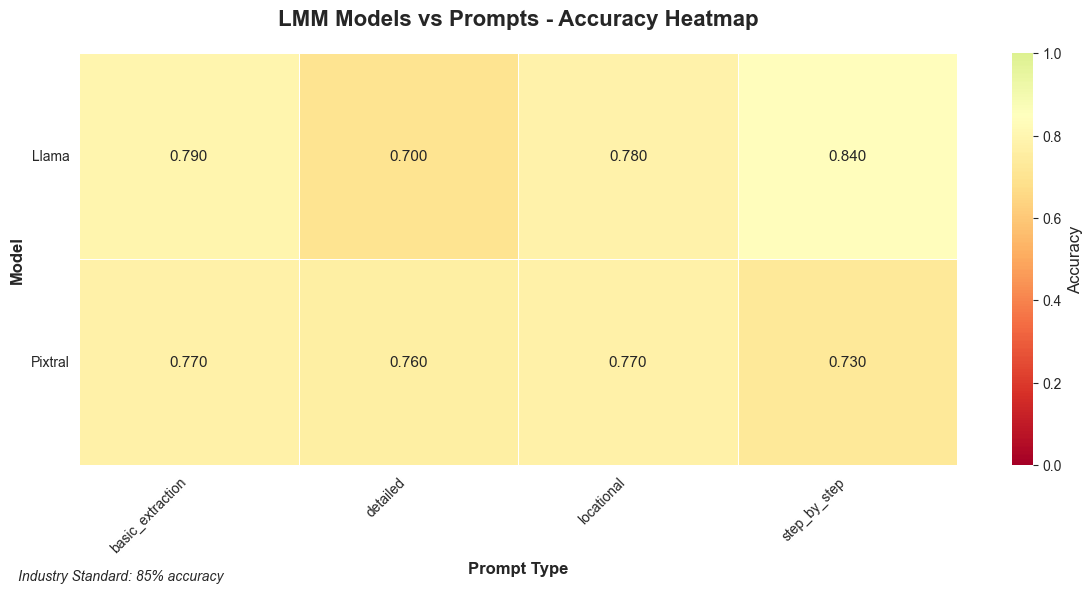

In [10]:
# LMM Models vs Prompts - Accuracy Heatmap
import importlib
importlib.reload(src.visualization)

fig, heatmap_data = src.visualization.generate_lmm_models_prompts_accuracy_heatmap(COMPREHENSIVE_DATASET)
plt.show()


🔍 Creating LMM Models vs Prompts CER Heatmap...

📊 CER HEATMAP ANALYSIS SUMMARY:
   • Models analyzed: 2
   • Prompt types: 4
   • Best combination (lowest CER): Pixtral + step_by_step (7.1%)


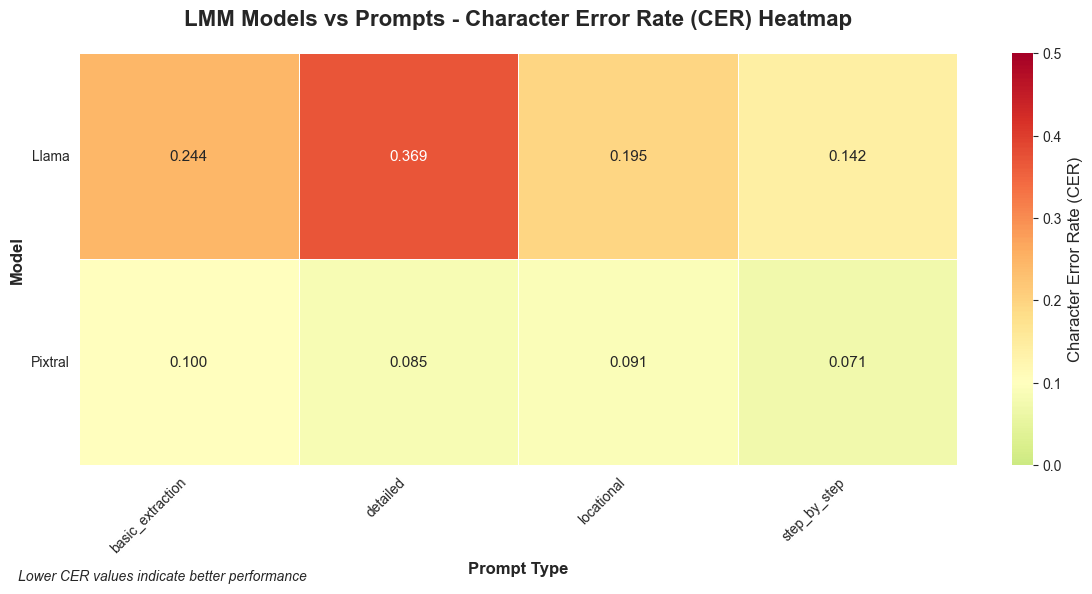

In [11]:
# LMM Models vs Prompts - CER Heatmap
fig, cer_heatmap_data = src.visualization.generate_lmm_models_prompts_cer_heatmap(COMPREHENSIVE_DATASET)
plt.show()


🔍 Creating LMM Query Types vs Prompts Accuracy Heatmap...

📊 QUERY-PROMPT HEATMAP ANALYSIS:
   • Prompt types analyzed: 4
   • Query types: Work Order, Total Cost
   • Average Work Order accuracy: 67.5%
   • Average Total Cost accuracy: 86.0%


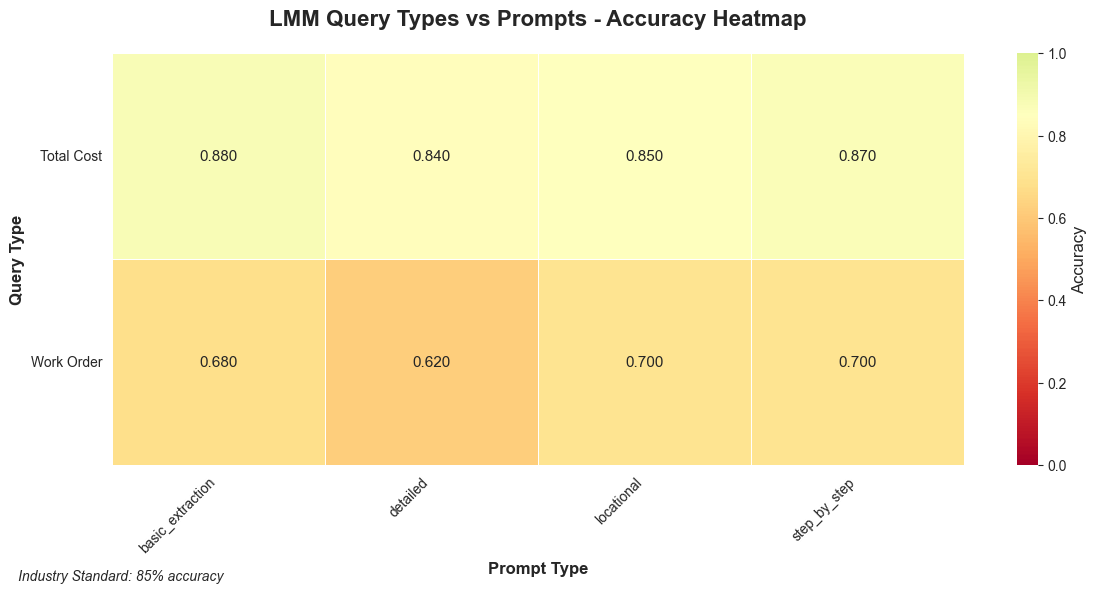

In [12]:
# LMM Query Types vs Prompts - Accuracy Heatmap
fig, query_heatmap_data = src.visualization.generate_lmm_query_prompts_accuracy_heatmap(COMPREHENSIVE_DATASET)
plt.show()


🔍 Creating LMM Query Types vs Prompts CER Heatmap...

📊 QUERY-PROMPT CER HEATMAP ANALYSIS:
   • Prompt types analyzed: 4
   • Query types: Work Order, Total Cost
   • Average Work Order CER: 16.2%
   • Average Total Cost CER: 16.2%


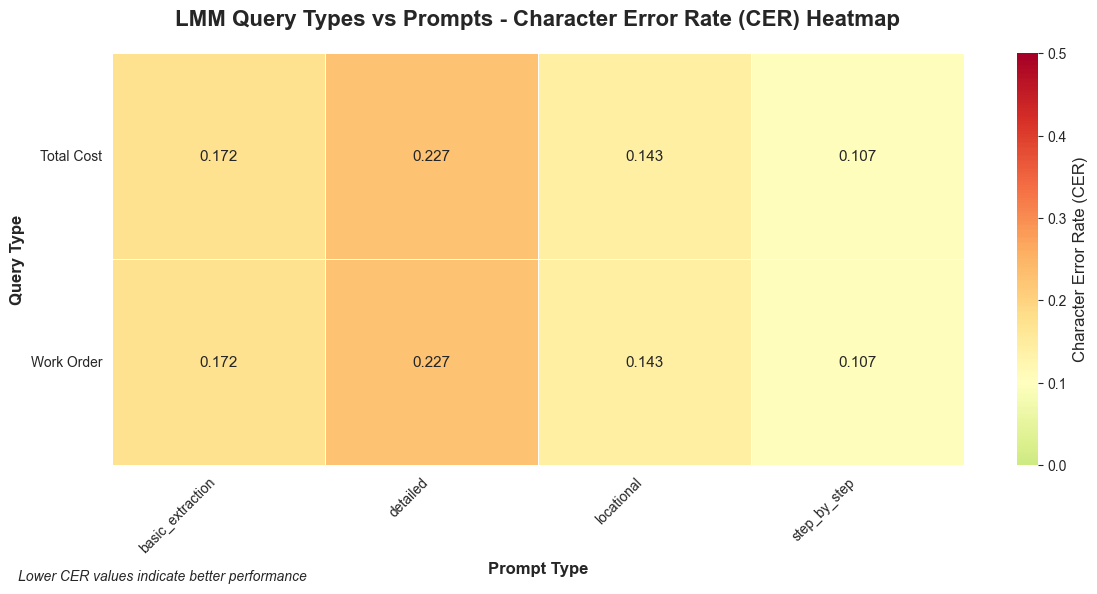

In [13]:
# LMM Query Types vs Prompts - CER Heatmap
fig, query_cer_data = src.visualization.generate_lmm_query_prompts_cer_heatmap(COMPREHENSIVE_DATASET)
plt.show()


🔍 Creating All Models vs Query Types Accuracy Heatmap...

📊 ALL MODELS HEATMAP ANALYSIS:
   • Total model configurations: 15
   • Query types: Work Order, Total Cost
   • Overall average accuracy: 61.2%
   • Best performing model: Llama-step_by_step


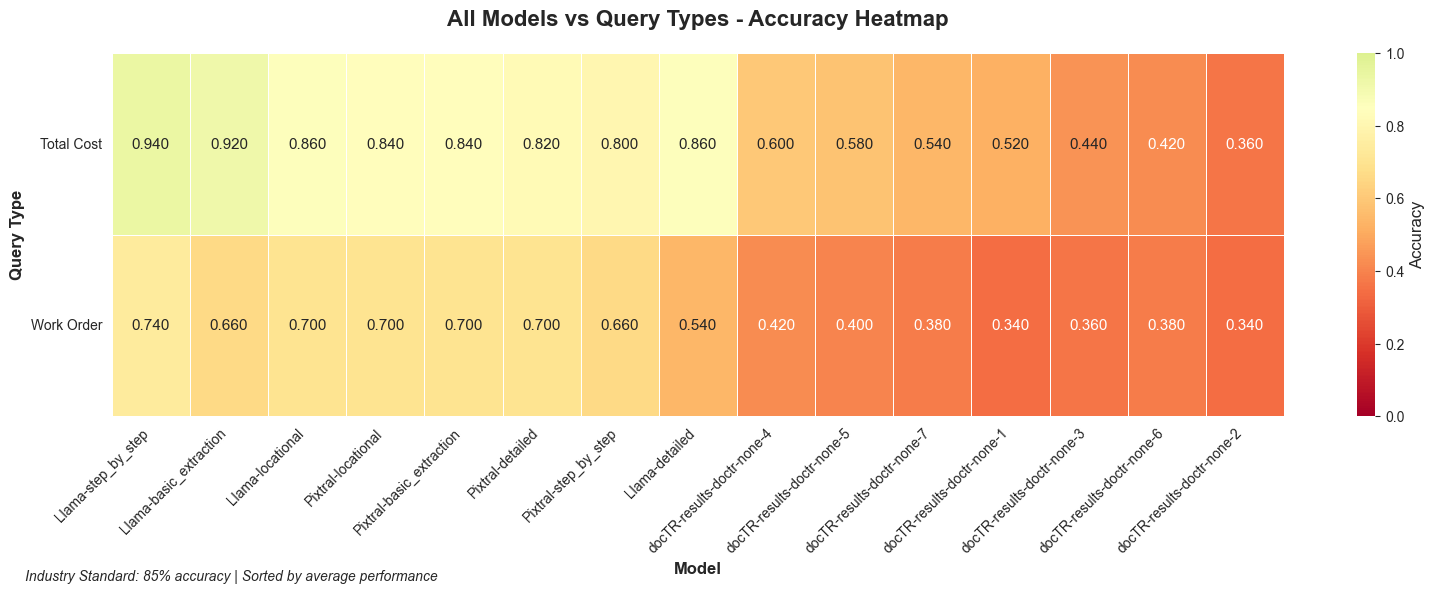

In [14]:
# All Models vs Query Types - Accuracy Heatmap
fig, all_models_data = src.visualization.generate_all_models_query_heatmap(COMPREHENSIVE_DATASET)
plt.show()


🔍 Calculating Model Performance Ranges...

📊 PERFORMANCE RANGE ANALYSIS:
   • Models analyzed: 3
   • Most consistent: Pixtral (range: 0.040)
   • Least consistent: Doctr (range: 0.160)
   • Average performance across models: 65.6%
   • Models meeting industry standard (≥85%): 0/3


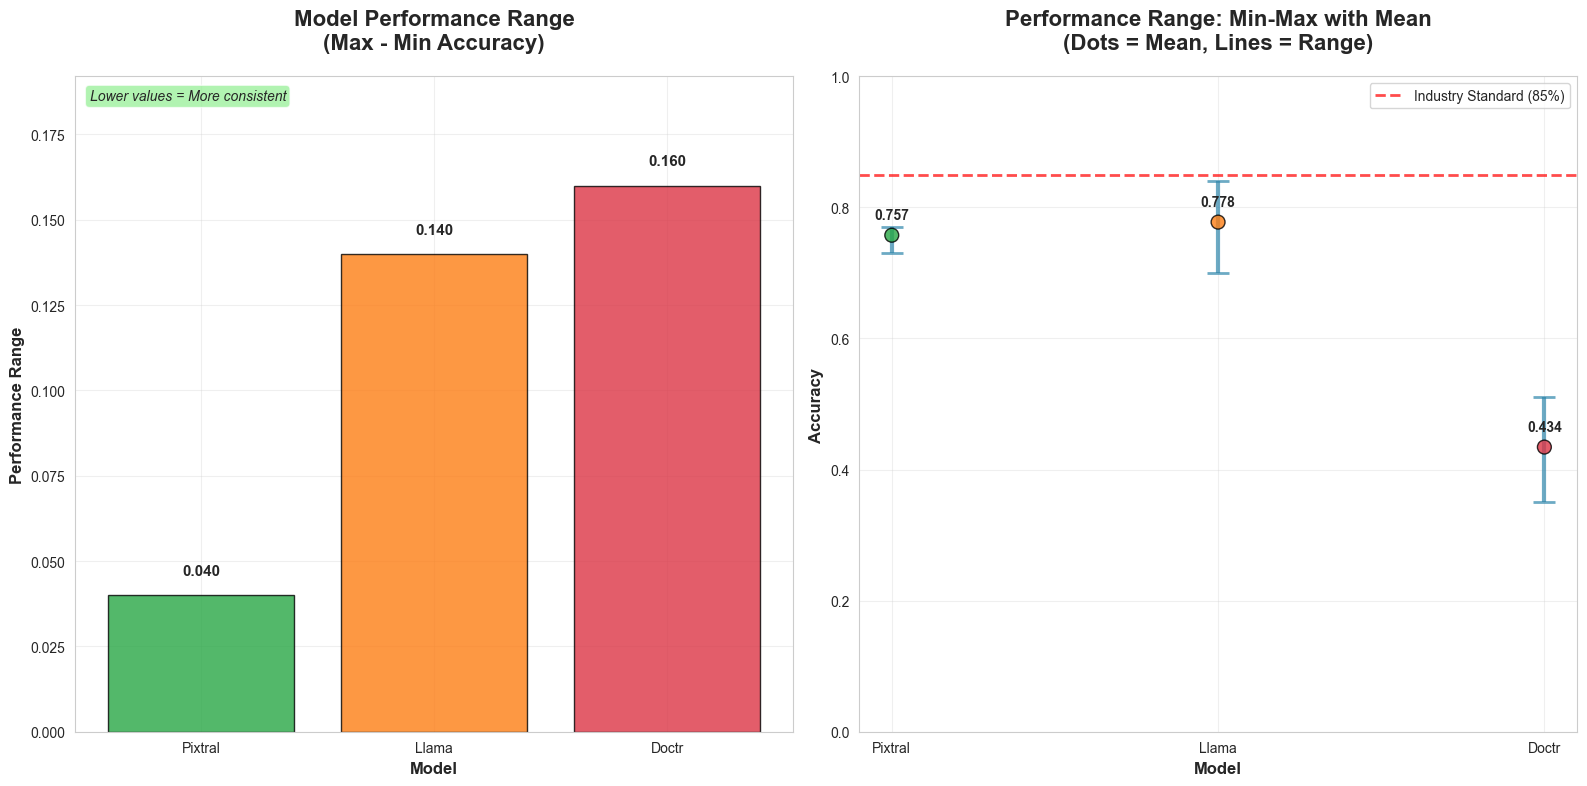

In [15]:
# Model Performance Range Analysis - Accuracy
import importlib
importlib.reload(src.visualization)

fig, performance_stats = src.visualization.generate_model_performance_range_analysis(COMPREHENSIVE_DATASET)
plt.show()


🔍 Calculating Model CER Ranges...

📊 CER RANGE ANALYSIS:
   • Models analyzed: 3
   • Most consistent: Pixtral (CER range: 0.030)
   • Least consistent: Llama (CER range: 0.228)
   • Average CER across models: 28.3%
   • Best performing model (lowest CER): Pixtral (8.7%)


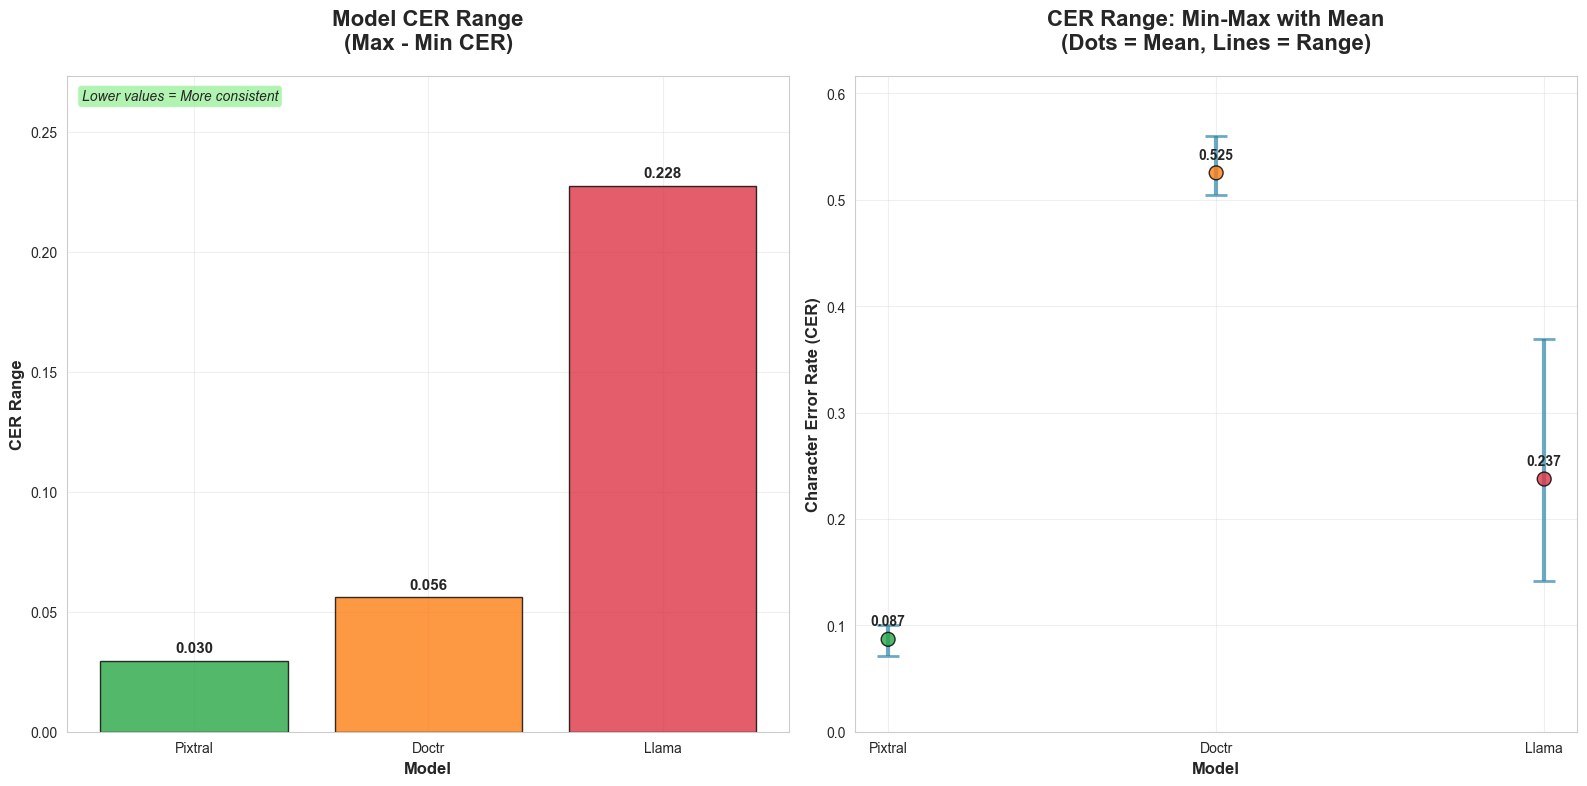

In [16]:
# Model Performance Range Analysis - CER
fig, cer_stats = src.visualization.generate_model_cer_range_analysis(COMPREHENSIVE_DATASET)
plt.show()


🔍 Creating Performance Gap Scatter Analysis...

📊 PERFORMANCE GAP ANALYSIS:
   • Model configurations analyzed: 15
   • Average gap (TC - WO): 0.155
   • Models where TC is easier: 15/15
   • Models where WO is easier: 0/15
   • Largest TC advantage: Llama-detailed (0.320)
   • Largest WO advantage: docTR-results-doctr-none-2 (0.020)
   • Accuracy-CER correlation: -0.922

📝 NOTE: Both charts now flow from worst (lower-left) to best (upper-right):
         Left: Low accuracy + high gap → High accuracy + low gap
         Right: High CER + high gap → Low CER + low gap
         Lower gaps are better (smaller performance difference between TC and WO extraction).


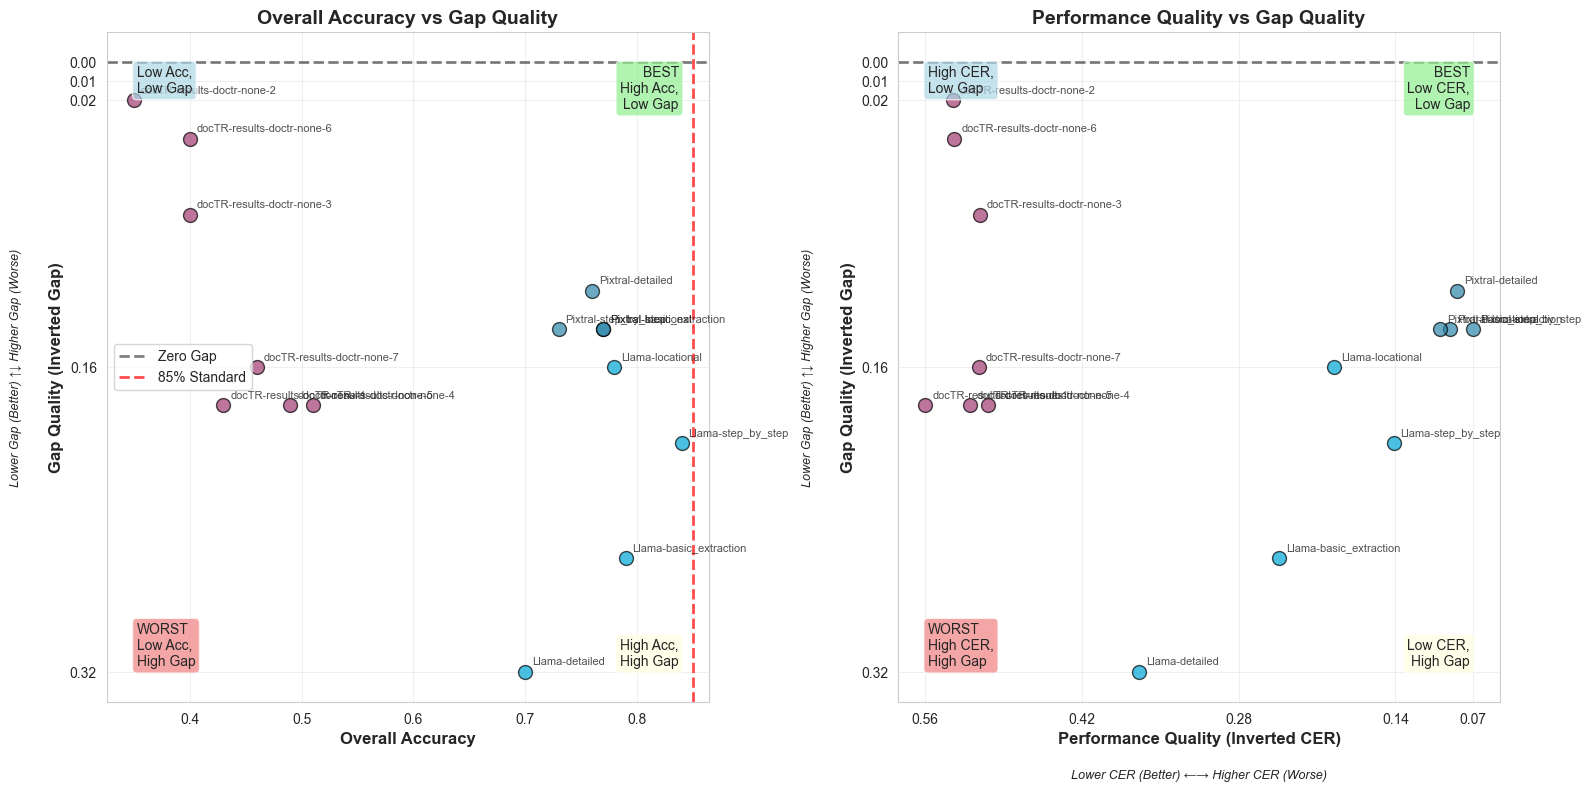

In [17]:
# Performance Gap Scatter Analysis
import importlib
importlib.reload(src.visualization)

fig, gap_data = src.visualization.generate_performance_gap_scatter_analysis(COMPREHENSIVE_DATASET)
plt.show()


## Section 3: Error Pattern Taxonomy & System Improvement Insights


### Cell 3.1: Systematic Error Analysis


*Placeholder for identification of patterns that could be addressed through post-processing.*


### Cell 3.2: Error Classification System


*Placeholder for categorization and quantification of different types of failures.*


### Cell 7.1: Performance per Resource Unit


*Placeholder for high-level statistical summary of all results.*


## Section 9: Synthesis & Key Insights


### Cell 9.1: Model Selection Decision Matrix


In [18]:
# Create Multi-Criteria Decision Matrix
# Weighted scoring across accuracy, speed, cost


In [19]:
# Create Use Case Recommendations
# Different models for different deployment scenarios


*Placeholder for providing clear guidance for model choice based on different criteria.*


### Cell 9.2: System Improvement Roadmap


In [20]:
# Create Improvement Opportunity Matrix
# Effort vs. Impact for different enhancement areas


In [21]:
# Create Implementation Timeline
# Suggested sequence for system improvements


*Placeholder for prioritizing enhancement opportunities based on analysis findings.*


### Cell 9.3: Unexpected Findings & Future Research


*Create Unexpected Findings Highlight* 
*Key discoveries and their implications*


*Create Future Research Opportunities
*Areas identified for continued investigation


*Placeholder for highlighting discoveries not anticipated in initial research design.*


In [22]:
# Load comprehensive dataset for CER box plot analysis
from src.data_loader import load_comprehensive_dataset

print("🔄 Loading comprehensive dataset for CER analysis...")
comprehensive_dataset = load_comprehensive_dataset()

# Verify data loading
if comprehensive_dataset and 'model_data' in comprehensive_dataset:
    total_experiments = sum(len(experiments) for experiments in comprehensive_dataset['model_data'].values())
    print(f"✅ Dataset loaded successfully!")
    print(f"   • Model types: {list(comprehensive_dataset['model_data'].keys())}")
    print(f"   • Total experiments: {total_experiments}")
else:
    print("❌ Failed to load comprehensive dataset")
    print("Please ensure all analysis files are present in the analysis/ directory")


ImportError: cannot import name 'load_comprehensive_dataset' from 'src.data_loader' (d:\UCSD_MJM\Deliverables-Code\notebooks\src\data_loader.py)

In [22]:
# Reload visualization module to get new functions
import importlib
importlib.reload(src.visualization)
from src.visualization import generate_model_cer_boxplot_analysis

# Generate CER box plot comparison
fig, cer_data = generate_model_cer_boxplot_analysis(comprehensive_dataset)
plt.show()

# Summary statistics
print("\n" + "="*80)
print("📈 CER BOX PLOT INSIGHTS:")
print("="*80)

if cer_data:
    # Calculate overall statistics
    all_cer_values = []
    model_count = len(cer_data)
    
    for model, values in cer_data.items():
        all_cer_values.extend(values)
    
    if all_cer_values:
        overall_median = np.median(all_cer_values)
        overall_mean = np.mean(all_cer_values)
        overall_std = np.std(all_cer_values)
        
        print(f"🔍 DATASET OVERVIEW:")
        print(f"   • Total model configurations: {model_count}")
        print(f"   • Total CER measurements: {len(all_cer_values)}")
        print(f"   • Overall median CER: {overall_median:.3f}")
        print(f"   • Overall mean CER: {overall_mean:.3f} (±{overall_std:.3f})")
        
        # Performance tier analysis
        excellent_count = sum(1 for x in all_cer_values if x < 0.1)
        good_count = sum(1 for x in all_cer_values if 0.1 <= x < 0.2)
        fair_count = sum(1 for x in all_cer_values if 0.2 <= x < 0.4)
        poor_count = sum(1 for x in all_cer_values if x >= 0.4)
        
        total_measurements = len(all_cer_values)
        
        print(f"\n📊 PERFORMANCE DISTRIBUTION:")
        print(f"   • Excellent (CER < 0.1): {excellent_count:3d} measurements ({100*excellent_count/total_measurements:5.1f}%)")
        print(f"   • Good (0.1 ≤ CER < 0.2): {good_count:3d} measurements ({100*good_count/total_measurements:5.1f}%)")
        print(f"   • Fair (0.2 ≤ CER < 0.4): {fair_count:3d} measurements ({100*fair_count/total_measurements:5.1f}%)")
        print(f"   • Poor (CER ≥ 0.4): {poor_count:3d} measurements ({100*poor_count/total_measurements:5.1f}%)")
        
        # Model type breakdown
        pixtral_models = [m for m in cer_data.keys() if m.startswith('Pixtral')]
        llama_models = [m for m in cer_data.keys() if m.startswith('Llama')]
        doctr_models = [m for m in cer_data.keys() if m.startswith('docTR')]
        
        print(f"\n🤖 MODEL TYPE BREAKDOWN:")
        print(f"   • Pixtral configurations: {len(pixtral_models)}")
        print(f"   • Llama configurations: {len(llama_models)}")
        print(f"   • docTR configurations: {len(doctr_models)}")
        
        # Best and worst performers
        model_medians = {model: np.median(values) for model, values in cer_data.items()}
        best_model = min(model_medians.items(), key=lambda x: x[1])
        worst_model = max(model_medians.items(), key=lambda x: x[1])
        
        print(f"\n🏆 PERFORMANCE EXTREMES:")
        print(f"   • Best performer: {best_model[0]} (median CER: {best_model[1]:.3f})")
        print(f"   • Worst performer: {worst_model[0]} (median CER: {worst_model[1]:.3f})")
        print(f"   • Performance gap: {worst_model[1] - best_model[1]:.3f} CER units")
        
        # Industry benchmark comparison
        industry_threshold = 0.1  # Excellent threshold
        models_meeting_threshold = sum(1 for median in model_medians.values() if median < industry_threshold)
        
        print(f"\n🎯 INDUSTRY BENCHMARK ANALYSIS:")
        print(f"   • Models meeting excellent threshold (< {industry_threshold}): {models_meeting_threshold}/{model_count} ({100*models_meeting_threshold/model_count:.1f}%)")
        
        if models_meeting_threshold > 0:
            print(f"   • These models are suitable for production deployment")
        else:
            print(f"   • No models currently meet the excellent threshold")
            # Find closest to threshold
            closest_model = min(model_medians.items(), key=lambda x: abs(x[1] - industry_threshold))
            print(f"   • Closest to threshold: {closest_model[0]} (CER: {closest_model[1]:.3f})")

print("\n" + "="*80)


NameError: name 'comprehensive_dataset' is not defined